In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cascade Cup IIT Guwahati/train.csv/train.csv')

In [ ]:
df.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'reassignment_method',
       'reassignment_reason', 'reassigned_order', 'session_time',
       'cancelled_time'],
      dtype='object')

In [ ]:
df.drop(['reassignment_reason', 'reassigned_order','reassignment_method'], axis = 1, inplace = True)
#df.drop(['reassignment_reason_None'], axis = 1, inplace = True)


In [ ]:
df.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'session_time',
       'cancelled_time'],
      dtype='object')

In [ ]:
#Replacing nan values with 0
df['alloted_orders'] = df['alloted_orders'].fillna(0)
#Converting dtype of alloted_orders from float to int 
df["alloted_orders"] = df["alloted_orders"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
df['delivered_orders'] = df['delivered_orders'].fillna(0)
#Converting dtype of delivered_orders from float to int 
df["delivered_orders"] = df["delivered_orders"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
df['undelivered_orders'] = df['undelivered_orders'].fillna(0)
#Converting dtype of undelivered_orders from float to int 
df["undelivered_orders"] = df["undelivered_orders"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
df['lifetime_order_count'] = df['lifetime_order_count'].fillna(0)
#Converting dtype of lifetime_order_count from float to int 
df["lifetime_order_count"] = df["lifetime_order_count"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
df['session_time'] = df['session_time'].fillna(0)
#Converting dtype of session_time from float to int 
df["session_time"] = df["session_time"].astype(float).astype(int)


In [ ]:
#If 'coerce', then invalid parsing will be set as NaT.

df['accept_time'] = pd.to_datetime(df['accept_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['order_time'] = pd.to_datetime(df['order_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['order_date'] = pd.to_datetime(df['order_date'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['allot_time'] = pd.to_datetime(df['allot_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')


In [ ]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [ ]:
df['delivered_time'] = pd.to_datetime(df['delivered_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['pickup_time'] = pd.to_datetime(df['pickup_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['delivered_time'] = pd.to_datetime(df['delivered_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['cancelled_time'] = pd.to_datetime(df['cancelled_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [ ]:
df['diffAllotOrder'] = (df['allot_time']-df['order_time'])
df['diffAcceptOrder'] = (df['accept_time']-df['order_time'])
df['diffAcceptAllot'] = (df['accept_time']-df['allot_time'])


In [ ]:
df['diffAllotOrder'] = df['diffAllotOrder'].dt.total_seconds()
df['diffAcceptOrder']  = df['diffAcceptOrder'].dt.total_seconds()
df['diffAcceptAllot']  = df['diffAcceptAllot'].dt.total_seconds()

In [ ]:
df['diffAllotOrder'] = df['diffAllotOrder'].fillna(0)
df['diffAcceptOrder'] = df['diffAcceptOrder'].fillna(0)
df['diffAcceptAllot'] = df['diffAcceptAllot'].fillna(0)


In [ ]:
df.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'pickup_time', 'delivered_time', 'rider_id', 'first_mile_distance',
       'last_mile_distance', 'alloted_orders', 'delivered_orders', 'cancelled',
       'undelivered_orders', 'lifetime_order_count', 'session_time',
       'cancelled_time', 'diffAllotOrder', 'diffAcceptOrder',
       'diffAcceptAllot'],
      dtype='object')

In [ ]:
df['total_distance'] = df['first_mile_distance'] + df['last_mile_distance']

In [ ]:
df['order_week'] = df['order_time'].dt.dayofweek


In [ ]:
df.groupby('order_week').size()


order_week
0    37833
1    78965
2    80462
3    80468
4    83548
5    49470
6    39254
dtype: int64

In [ ]:
df['order_hour'] = df['order_time'].dt.hour


In [ ]:
df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,diffAllotOrder,diffAcceptOrder,diffAcceptAllot,total_distance,order_week,order_hour
count,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000
mean,369143.080767,7763.244016,1.229889,2.968873,100.680653,99.944660,0.011596,0.734718,853.540124,218.187691,73.199969,134.017927,60.984378,4.198762,2.885242,12.723800
std,131146.906408,5592.880135,0.846183,1.884124,90.637362,90.144218,0.107057,1.056017,1502.916200,177.099963,275.048691,283.917223,107.441954,2.163998,1.742036,3.619623
min,118350.000000,0.000000,0.000134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28534.000000,0.003224,0.000000,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,31.000000,31.000000,0.000000,0.000000,165.000000,82.000000,1.000000,33.000000,14.000000,2.517800,1.000000,9.000000
50%,369842.500000,6754.000000,1.138700,2.670000,77.000000,77.000000,0.000000,0.000000,396.000000,173.000000,15.000000,64.000000,37.000000,3.977900,3.000000,14.000000
75%,482342.250000,11965.000000,1.853000,4.220000,144.000000,143.000000,0.000000,1.000000,948.000000,314.000000,48.000000,112.000000,63.000000,5.601600,4.000000,16.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1298.000000,32334.000000,15598.000000,930.000000,45.828100,6.000000,21.000000


In [ ]:
input = df.drop(['order_time','order_date','allot_time','accept_time','pickup_time','delivered_time','cancelled','cancelled_time'],axis = 1)


In [ ]:
input.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'diffAllotOrder',
       'diffAcceptOrder', 'diffAcceptAllot', 'total_distance', 'order_week',
       'order_hour'],
      dtype='object')

In [ ]:
##accept time and pickup time of placed at restaurant 

x = df[['diffAcceptAllot']].apply(pd.to_numeric)     
x.head(60)
b=x<0
b.sum()

## Out of 450k+ data records, 2431 times the driver reached the restaurant before accepting the order-->0.5%
## Most of the time driver accepted the order before pickup time

diffAcceptAllot    25
dtype: int64

[0.0710254  0.07718902 0.0707431  0.07151688 0.06612488 0.06252485
 0.03596095 0.06725819 0.07363548 0.08337935 0.08614914 0.07471902
 0.07050473 0.03451844 0.05475056]


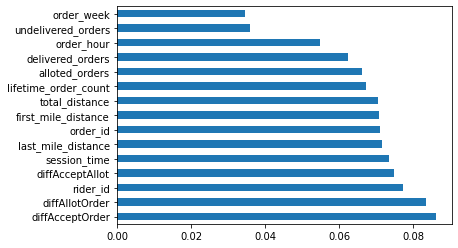

In [ ]:
X = input #independent columns
y = df['cancelled']   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()


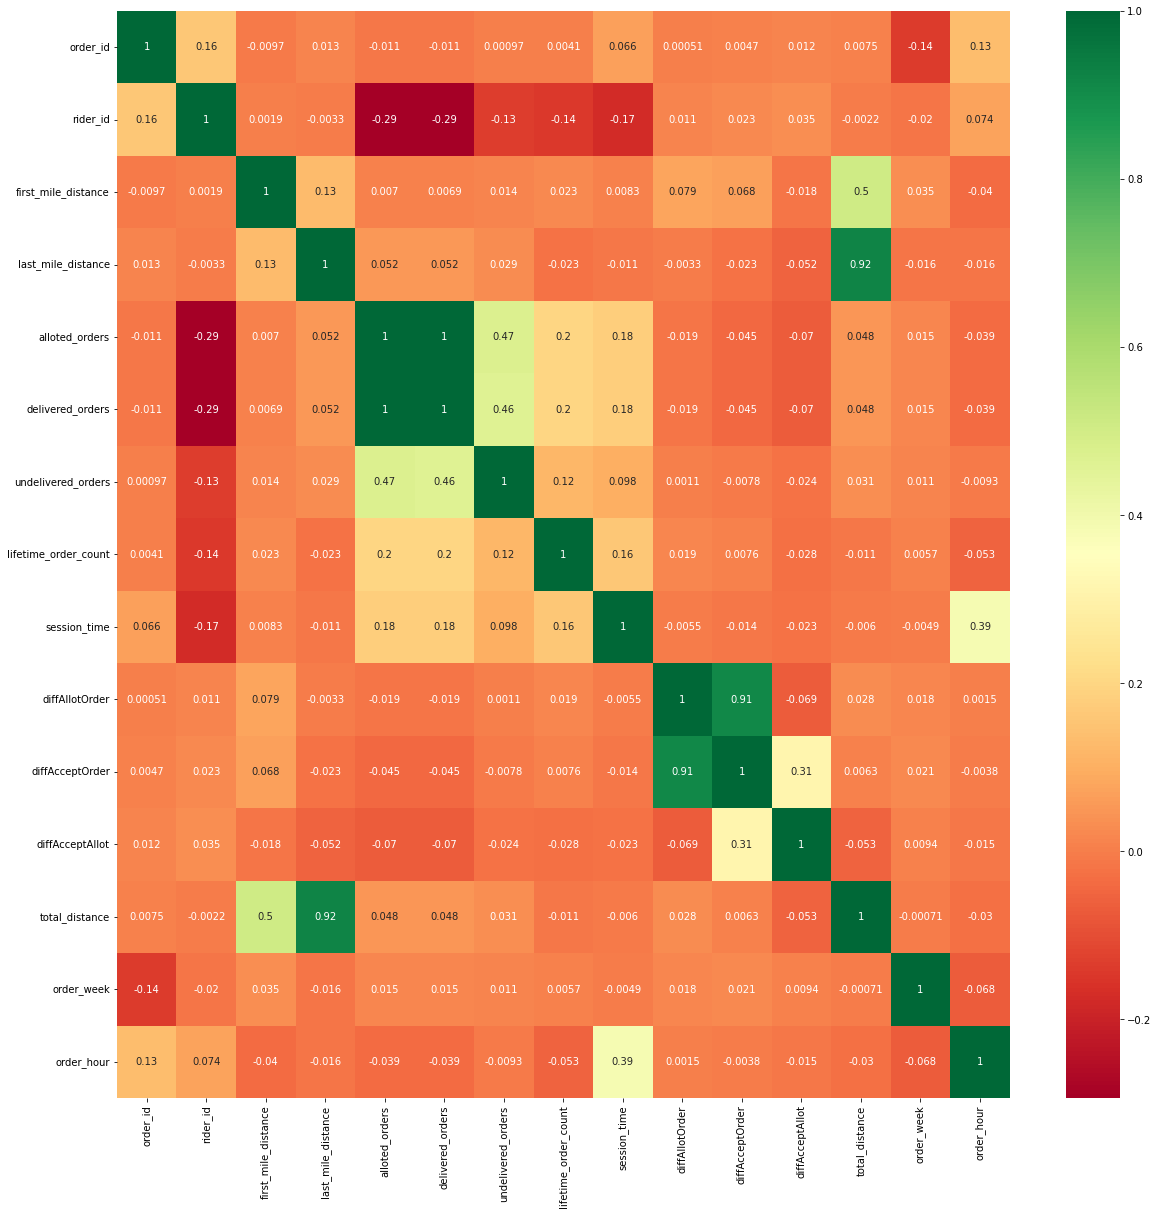

In [ ]:
import seaborn as sns

X = input  #independent columns
y = df['cancelled']    #target column i.e price range
#get correlations of each features in dataset
corrmat = input.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(input[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Test data

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Cascade Cup IIT Guwahati/test.csv/test.csv')

In [ ]:
test_data.drop(['reassignment_reason', 'reassigned_order','reassignment_method'], axis = 1, inplace = True)


In [ ]:
#Replacing nan values with 0
test_data['alloted_orders'] = test_data['alloted_orders'].fillna(0)
#Converting dtype of alloted_orders from float to int 
test_data["alloted_orders"] = test_data["alloted_orders"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
test_data['delivered_orders'] = test_data['delivered_orders'].fillna(0)
#Converting dtype of delivered_orders from float to int 
test_data["delivered_orders"] = test_data["delivered_orders"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
test_data['undelivered_orders'] = test_data['undelivered_orders'].fillna(0)
#Converting dtype of undelivered_orders from float to int 
test_data["undelivered_orders"] = test_data["undelivered_orders"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
test_data['lifetime_order_count'] = test_data['lifetime_order_count'].fillna(0)
#Converting dtype of lifetime_order_count from float to int 
test_data["lifetime_order_count"] = test_data["lifetime_order_count"].astype(float).astype(int)


In [ ]:
#Replacing nan values with 0
test_data['session_time'] = test_data['session_time'].fillna(0)
#Converting dtype of session_time from float to int 
test_data["session_time"] = test_data["session_time"].astype(float).astype(int)


In [ ]:
#If 'coerce', then invalid parsing will be set as NaT.

test_data['accept_time'] = pd.to_datetime(test_data['accept_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

test_data['order_time'] = pd.to_datetime(test_data['order_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

test_data['order_date'] = pd.to_datetime(test_data['order_date'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

test_data['allot_time'] = pd.to_datetime(test_data['allot_time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')



In [ ]:
test_data['diffAllotOrder'] = (test_data['allot_time']-test_data['order_time'])
test_data['diffAcceptOrder'] = (test_data['accept_time']-test_data['order_time'])
test_data['diffAcceptAllot'] = (test_data['accept_time']-test_data['allot_time'])


In [ ]:
test_data['diffAllotOrder'] = test_data['diffAllotOrder'].dt.total_seconds()
test_data['diffAcceptOrder']  = test_data['diffAcceptOrder'].dt.total_seconds()
test_data['diffAcceptAllot']  = test_data['diffAcceptAllot'].dt.total_seconds()

In [ ]:
test_data['diffAllotOrder'] = test_data['diffAllotOrder'].fillna(0)
test_data['diffAcceptOrder'] = test_data['diffAcceptOrder'].fillna(0)
test_data['diffAcceptAllot'] = test_data['diffAcceptAllot'].fillna(0)


In [ ]:
test_data['total_distance'] = test_data['first_mile_distance'] + test_data['last_mile_distance']

In [ ]:
test_data['order_week'] = test_data['order_time'].dt.dayofweek
test_data['order_hour'] = test_data['order_time'].dt.hour


In [ ]:
test_data.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'diffAllotOrder',
       'diffAcceptOrder', 'diffAcceptAllot', 'total_distance', 'order_week',
       'order_hour'],
      dtype='object')

Converting accept time to seconds




test_data['accept_time_hour'] = test_data['accept_time'].dt.hour
test_data['accept_time_minute'] = test_data['accept_time'].dt.minute
test_data['accept_time_second'] = test_data['accept_time'].dt.second



test_data['accept_time_sec'] = test_data['accept_time_hour']*60*60 + test_data['accept_time_minute']*60 + test_data['accept_time_second']

Calculating pickup time

#using speed = 0.o01465 that is the median of speed in train data
test_data['f_time_sec'] = test_data['first_mile_distance']/ 0.001465

test_data['accept_time'] = pd.to_datetime(test_data.accept_time).dt.strftime('%H:%M:%S')


test_data['pickup_time'] = pd.to_timedelta(test_data['accept_time']) + pd.to_timedelta(test_data['f_time_sec'], unit='s')


Difference of pickup time and accept time in seconds

test_data['pickup_time_sec'] = test_data['pickup_time'].dt.total_seconds()

test_data['diffPickUpAccept'] = test_data['pickup_time_sec'] - test_data['accept_time_sec'] 

test_data['diffPickUpAccept'].head()

In [ ]:
test_data.shape

(144844, 19)

In [ ]:
X_test = test_data.drop(['order_time','order_date','allot_time','accept_time'],axis = 1)


In [ ]:
X_test.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'diffAllotOrder',
       'diffAcceptOrder', 'diffAcceptAllot', 'total_distance', 'order_week',
       'order_hour'],
      dtype='object')

In [ ]:
X_test.shape


(144844, 15)

## Splitting the dataset into train and validation data

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2,random_state=42)
X_train = X
y_train = y

In [ ]:
from sklearn.metrics import accuracy_score


* n_jobs: -1
* objective: binary:logistic
* eta: 0.1
* max_depth: 5
* min_child_weight: 6
* subsample: 0.9827722984118861
* colsample_bytree: 0.7323565805217428
* eval_metric: logloss
* lambda: 2.0786963669125065
* alpha: 8.887990254812337
* max_rounds: 1000
* early_stopping_rounds: 50
* explain_level: 0


In [ ]:
import xgboost as xgb


# specify hyperparameters
params = {'n_jobs':1,
          'objective': 'binary:logistic',
          'min_child_weight':6,
          'subsample':0.9827722984118861,
          'colsample_bytree':0.7323565805217428,
          'eval_metric': 'logloss',
          'lambda':2.0786963669125065,
          'alpha':8.887990254812337,
          'max_rounds':1000,
          'early_stopping_rounds':50,
          'explain_level':0,
          'max_depth': 5,
          'eta': 0.1
         }

epochs = 10

In [ ]:
#data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xgc = xgb.XGBClassifier(n_jobs=1,
          objective= 'binary:logistic',
          min_child_weight=6,
          subsample=0.9827722984118861,
          colsample_bytree=0.7323565805217428,
          eval_metric= 'logloss',
          use_label_encoder=False,
          
          alpha=8.887990254812337,
          max_rounds=1000,
          early_stopping_rounds=50,
          explain_level=0,
          max_depth= 5,
          eta= 0.1)
xgc.fit(X_train,y_train)


[18:00:25] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "explain_level", "max_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(alpha=8.887990254812337, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7323565805217428, early_stopping_rounds=50,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              explain_level=0, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=5, max_rounds=1000,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=8.88799, reg_lambda=1,
              scale_pos_weight=1, ...)

In [ ]:
y_pred = xgc.predict(X_val)

In [ ]:
accuracy_score(y_pred, y_val)

0.9896444444444444

In [ ]:
y_pred = pd.DataFrame(y_pred, columns =['cancelled'])

In [ ]:
y_pred['cancelled'].value_counts()

0    89887
1      113
Name: cancelled, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

print('Train Classification Report \n ',classification_report(y_val,xgc.predict(X_val)))


Train Classification Report 
                precision    recall  f1-score   support

           0       0.99      1.00      0.99     89023
           1       0.70      0.08      0.14       977

    accuracy                           0.99     90000
   macro avg       0.84      0.54      0.57     90000
weighted avg       0.99      0.99      0.99     90000



On test data

In [ ]:
y_pred_test = xgc.predict(X_test)

In [ ]:
y_pred_test = pd.DataFrame(y_pred_test, columns =['cancelled'])

In [ ]:
y_pred_test['order_id'] = X_test['order_id']

In [ ]:
y_pred_test = y_pred_test[['order_id', 'cancelled']]


In [ ]:
y_pred_test['cancelled'].value_counts()

0    144391
1       453
Name: cancelled, dtype: int64

In [ ]:
y_pred_test.to_csv('./submission_xgb_optuna.csv',index = False)

# Implementing evalml

In [ ]:
!pip install evalml

In [ ]:
import evalml

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()


In [ ]:
automl.rankings


,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,NaN,NaN,0.182030,55.161797,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,NaN,NaN,0.189995,53.199856,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,NaN,NaN,0.197576,51.332610,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,2,Logistic Regression Classifier w/ Label Encode...,2,NaN,NaN,0.211092,48.003180,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,NaN,NaN,0.211559,47.888217,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,NaN,NaN,0.216826,46.590694,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,NaN,NaN,0.405971,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."
7,7,Decision Tree Classifier w/ Label Encoder + Im...,7,NaN,NaN,0.436133,-7.429509,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,NaN,NaN,0.538848,-32.730544,False,"{'Label Encoder': {'positive_label': None}, 'I..."


In [ ]:
#Getting The Best Pipeline
automl.best_pipeline


pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Undersampler': ['Undersampler', 'Imputer.x', 'Label Encoder.y'], 'LightGBM Classifier': ['LightGBM Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'LightGBM Classifier':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9}}, random_seed=0)

In [ ]:
best_pipeline=automl.best_pipeline


In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])



*****************************************************************
* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler *
*****************************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
4. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for binary problems.
Total training time (including CV): 4.8 seconds

Cross Validation
----------------
            Log Loss Binary MCC Binary  Gini   AUC Precision    F1 Balan

In [ ]:
### Evaluate on hold out data
#best_pipeline.score(X_val, y_val, objectives=["auc","f1","Precision","Recall"])


In [ ]:
best_pipeline.save("model.pkl")


In [ ]:
check_model=automl.load('model.pkl')


In [ ]:
X_train.shape

(450000, 15)

In [ ]:
X_train.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'diffAllotOrder',
       'diffAcceptOrder', 'diffAcceptAllot', 'total_distance', 'order_week',
       'order_hour'],
      dtype='object')

In [ ]:
X_test.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'session_time', 'diffAllotOrder',
       'diffAcceptOrder', 'diffAcceptAllot', 'total_distance', 'order_week',
       'order_hour'],
      dtype='object')

In [ ]:
y_predval = check_model.predict_proba(X_test)


In [ ]:
y_predval.columns

Index([0, 1, 'cancelled'], dtype='object')

In [ ]:
y_predval['cancelled']=np.where(y_predval[0] > 0.5 , 0,1)

In [ ]:
y_predval.isna().sum()

0            0
1            0
cancelled    0
dtype: int64

In [ ]:
y_predval['cancelled'].value_counts()

0    140202
1      4642
Name: cancelled, dtype: int64

In [ ]:
final_df = pd.DataFrame()

In [ ]:
final_df['order_id'] = X_test['order_id']

In [ ]:
final_df['cancelled'] = y_predval['cancelled']

In [ ]:
final_df.shape

(144844, 2)

In [ ]:
final_df.to_csv('./submission_evalml.csv',index = False)

In [ ]:
final_df

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


In [ ]:
final_df.isna().sum()

order_id     0
cancelled    0
dtype: int64

#Evalml 2

In [ ]:
automl1 = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary',ensembling=True,max_batches=100,verbose=True)


Generating pipelines to search over...
Ensembling will run every 9 batches.
8 pipelines ready for search.


In [ ]:
automl1.search()


*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 100 batches for a total of 460 pipelines. 
Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.406

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.212
Logistic Regression Classifier w/ Label Encoder + Imputer + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.211
XGBoost Classifier w/ Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.190
LightGBM Classifier w/ Label Encoder + Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.182
CatBoost Classifier w/ Label Encoder + Imputer + Undersampler:
	St

In [ ]:
automl1.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Undersampler': ['Undersampler', 'Imputer.x', 'Label Encoder.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Undersampler.x', 'Undersampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1, 'sampling_ratio_dict': None}, 'XGBoost Classifier':{'eta': 0.11099952253547658, 'max_depth': 10, 'min_child_weight': 3.517518663921147, 'n_estimators': 395, 'n_jobs': -1, 'eval_metric': 'logloss'}}, random_seed=0)

In [ ]:
best_pipeline=automl1.best_pipeline


In [ ]:
automl1.describe_pipeline(automl1.rankings.iloc[0]["id"])



****************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Undersampler *
****************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
4. XGBoost Classifier
	 * eta : 0.11099952253547658
	 * max_depth : 10
	 * min_child_weight : 3.517518663921147
	 * n_estimators : 395
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 15.7 seconds

Cross Validation
----------------
            Log Loss Binary MCC Binary  Gini   AUC Precision    F1 Balanced Accuracy Binary Accuracy Binary # Training # V

In [ ]:
### Evaluate on hold out data
#best_pipeline.score(X_val, y_val, objectives=["auc","f1","Precision","Recall"])


In [ ]:
best_pipeline.save("model1.pkl")


In [ ]:
check_model=automl1.load('model1.pkl')


In [ ]:
y_predval = check_model.predict_proba(X_test)


In [ ]:
y_predval.columns

Int64Index([0, 1], dtype='int64')

In [ ]:
y_predval['cancelled']=np.where(y_predval[0] > 0.5 , 0,1)

In [ ]:
y_predval.isna().sum()

0            0
1            0
cancelled    0
dtype: int64

In [ ]:
y_predval['cancelled'].value_counts()

0    140102
1      4742
Name: cancelled, dtype: int64

In [ ]:
final_df = pd.DataFrame()

In [ ]:
final_df['order_id'] = X_test['order_id']

In [ ]:
final_df['cancelled'] = y_predval['cancelled']

In [ ]:
final_df.shape

(144844, 2)

In [ ]:
final_df.to_csv('./submission_evalml1.csv',index = False)

In [ ]:
final_df

,order_id,cancelled
0,130231,0
1,130232,0
2,130233,0
3,130234,0
4,130235,0
...,...,...
144839,41184,0
144840,41185,0
144841,41186,0
144842,41187,0


#Implementing H2O Auto ML

In [ ]:
!pip install h2o

     |████████████████████████████████| 176.0 MB 5.1 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=bae10ff82125196c1955d5ee590a7176b827cce18aeb07df28fce44555851f0d
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML


In [ ]:
# Start the H2O cluster (locally)
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9wuwvzzt
  JVM stdout: /tmp/tmp9wuwvzzt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9wuwvzzt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_tewttp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 20, seed = 10, verbosity="info", nfolds=2)


In [ ]:
df = h2o.import_file("/content/drive/MyDrive/Cascade Cup IIT Guwahati/train.csv/train.csv")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
test = h2o.import_file("/content/drive/MyDrive/Cascade Cup IIT Guwahati/test.csv/test.csv")


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
xtest = df.columns  ## Independent variable
xtest.remove('delivered_time')
xtest.remove('pickup_time')
xtest.remove('cancelled_time')

In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])


In [ ]:
y = "cancelled"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('delivered_time')
x.remove('pickup_time')
x.remove('cancelled_time')


In [ ]:
aml.train(x=x,y=y, training_frame=df)


AutoML progress: |
17:27:02.755: Project: AutoML_1_20220206_172702
17:27:02.795: Setting stopping tolerance adaptively based on the training frame: 0.0014907119849998597
17:27:02.795: Build control seed: 10
17:27:02.803: training frame: Frame key: AutoML_1_20220206_172702_training_train.hex    cols: 20    rows: 450000  chunks: 8    size: 33108968  checksum: 6505914065297589928
17:27:02.804: validation frame: NULL
17:27:02.810: leaderboard frame: NULL
17:27:02.812: blending frame: NULL
17:27:02.812: response column: cancelled
17:27:02.812: fold column: null
17:27:02.813: weights column: null
17:27:02.863: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), 

In [ ]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_1_AutoML_1_20220206_172702,0.0103077,0.101527,0.0103077,0.0206536,0.0707324
StackedEnsemble_BestOfFamily_2_AutoML_1_20220206_172702,0.0104331,0.102143,0.0104331,0.0210422,0.0712629
StackedEnsemble_BestOfFamily_1_AutoML_1_20220206_172702,0.0104373,0.102163,0.0104373,0.0210644,0.0712787
XGBoost_1_AutoML_1_20220206_172702,0.0106138,0.103023,0.0106138,0.0256904,0.0727119
GBM_1_AutoML_1_20220206_172702,0.0108109,0.103975,0.0108109,0.0218647,0.072255
GBM_2_AutoML_1_20220206_172702,0.0108742,0.10428,0.0108742,0.0221775,0.0719719
GBM_3_AutoML_1_20220206_172702,0.0109409,0.104599,0.0109409,0.0222711,0.0721876
GBM_4_AutoML_1_20220206_172702,0.0109728,0.104751,0.0109728,0.0223514,0.0723649
GLM_1_AutoML_1_20220206_172702,0.0110684,0.105206,0.0110684,0.0225015,0.0730352
DRF_1_AutoML_1_20220206_172702,0.0125846,0.112181,0.0125846,0.0218904,0.0801497


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids


['StackedEnsemble_AllModels_1_AutoML_1_20220206_172702',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220206_172702',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220206_172702',
 'XGBoost_1_AutoML_1_20220206_172702',
 'GBM_1_AutoML_1_20220206_172702',
 'GBM_2_AutoML_1_20220206_172702',
 'GBM_3_AutoML_1_20220206_172702',
 'GBM_4_AutoML_1_20220206_172702',
 'GLM_1_AutoML_1_20220206_172702',
 'DRF_1_AutoML_1_20220206_172702',
 'XGBoost_2_AutoML_1_20220206_172702',
 'XGBoost_3_AutoML_1_20220206_172702']

In [ ]:
aml.leader.model_performance(df_test)



ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.00956730226696588
RMSE: 0.09781258746687913
MAE: 0.019764943505416997
RMSLE: 0.06758332563953877
R^2: 0.1629559111461164
Mean Residual Deviance: 0.00956730226696588
Null degrees of freedom: 90023
Residual degrees of freedom: 90017
Null deviance: 1028.9624020768747
Residual deviance: 861.2868192813364
AIC: -163064.9013929962


In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params


{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_1_AutoML_1_20220206_172702',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_1_20220206_172702',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220206_172702',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220206_172702',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML

In [ ]:
aml.leader


In [ ]:
y_pred=aml.leader.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred


predict
0.0119563
0.0439678
-0.00318844
0.0102255
-0.00264265
0.0302399
-0.00236501
0.0405382
0.00293561
0.0092175


In [ ]:
type(y_pred)

h2o.frame.H2OFrame

In [ ]:
prediction = y_pred.as_data_frame()


In [ ]:
prediction

,predict
0,0.011956
1,0.043968
2,-0.003188
3,0.010226
4,-0.002643
...,...
144839,0.945420
144840,0.948373
144841,0.943726
144842,0.929519


In [ ]:
prediction['cancelled']=np.where(prediction['predict'] > 0.5 , 1,0)

In [ ]:
prediction['cancelled'].value_counts()

1    144347
0       497
Name: cancelled, dtype: int64

In [ ]:
#accuracy_score(y_val, prediction['cancelled'])

NameError: ignored

In [ ]:
final_df = pd.DataFrame()

In [ ]:
final_df['order_id'] = X_test['order_id']

In [ ]:
final_df['cancelled'] = prediction['cancelled']

In [ ]:
final_df.shape

(144844, 2)

In [ ]:
final_df.to_csv('./submission_h2o.csv',index = False)